In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r"train.csv")
test_data = pd.read_csv(r"test.csv")

In [3]:
print('Train Data sample')
print(train_data.head())
print('Shape of the train data file {}'.format(train_data.shape))
print('Shape of the train data file {}'.format(test_data.shape))

Train Data sample
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0 

In [4]:
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')

9.0

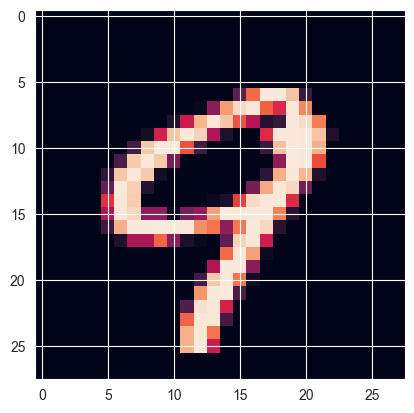

In [5]:
plt.imshow(train_data[100,1:].reshape(28,28))
label = train_data[100,0]
label

In [6]:
x_train = train_data[:,1:]
x_train = x_train/255.
y_train = train_data[:,0]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=5)

In [8]:
print('Shape of x Train data is {}'.format(x_train.shape))
print('Shape of y Train data is {}'.format(y_train.shape))
print('Shape of x test data is {}'.format(x_test.shape))
print('Shape of y test data is {}'.format(y_test.shape))

Shape of x Train data is (33600, 784)
Shape of y Train data is (33600,)
Shape of x test data is (8400, 784)
Shape of y test data is (8400,)


In [9]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, 3, 3, input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [14]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])
epochs = 80
model.fit(x_train, y_train, batch_size = 512, epochs = epochs, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/80


66/66 [==============================] - 1s 6ms/step - loss: 1.7287 - accuracy: 0.5161 - val_loss: 0.9927 - val_accuracy: 0.7263
Epoch 2/80
66/66 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.7979 - val_loss: 0.5521 - val_accuracy: 0.8427
Epoch 3/80
66/66 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.8665 - val_loss: 0.4180 - val_accuracy: 0.8773
Epoch 4/80
66/66 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8943 - val_loss: 0.3480 - val_accuracy: 0.8987
Epoch 5/80
66/66 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.9096 - val_loss: 0.3037 - val_accuracy: 0.9121
Epoch 6/80
66/66 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.9185 - val_loss: 0.2769 - val_accuracy: 0.9202
Epoch 7/80
66/66 [==============================] - 0s 4ms/step - loss: 0.2453 - accuracy: 0.9261 - val_loss: 0.2542 - val_accuracy: 0.9251
Epoch 8/80
66/66 [=============

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 17066 (66.66 KB)
Trainable params: 17066 (66.66 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [16]:
x_test = test_data/255.
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

875/875 [==============================] - 1s 802us/step


4

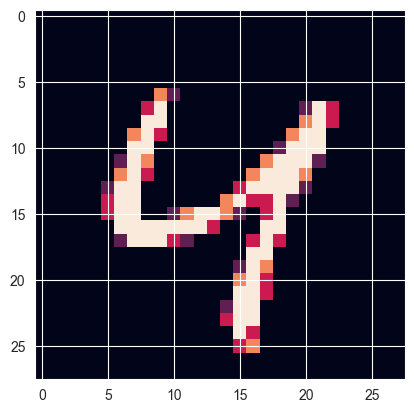

In [18]:
plt.imshow(test_data[14,:].reshape(28,28))
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions[14]

In [19]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [20]:
np.savetxt("res.csv", predictions, delimiter=",")